In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle as astropy_ls

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


In [2]:
data = pd.read_csv('times_input.txt', sep='\t')

times = data['time'].values
times_err = data['time_err'].values
epochs = data['epoch'].values+1



In [3]:
Pmin = 2
Pmax = 100
fmin = 1/Pmax
fmax = 1/Pmin

fgrid = np.arange(fmin, fmax, 0.1*fmin)
Pgrid = np.sort(1/fgrid)

Pgrid

array([  2.00400802,   2.00803213,   2.01207243,   2.01612903,
         2.02020202,   2.0242915 ,   2.02839757,   2.03252033,
         2.03665988,   2.04081633,   2.04498978,   2.04918033,
         2.05338809,   2.05761317,   2.06185567,   2.0661157 ,
         2.07039337,   2.0746888 ,   2.07900208,   2.08333333,
         2.08768267,   2.09205021,   2.09643606,   2.10084034,
         2.10526316,   2.10970464,   2.1141649 ,   2.11864407,
         2.12314225,   2.12765957,   2.13219616,   2.13675214,
         2.14132762,   2.14592275,   2.15053763,   2.15517241,
         2.15982721,   2.16450216,   2.1691974 ,   2.17391304,
         2.17864924,   2.18340611,   2.18818381,   2.19298246,
         2.1978022 ,   2.20264317,   2.20750552,   2.21238938,
         2.2172949 ,   2.22222222,   2.22717149,   2.23214286,
         2.23713647,   2.24215247,   2.24719101,   2.25225225,
         2.25733634,   2.26244344,   2.2675737 ,   2.27272727,
         2.27790433,   2.28310502,   2.28832952,   2.29

In [4]:
from scipy import optimize

def get_times_model(epochs, T0, P, alpha_ttv, beta_ttv): 
    return T0 + P*epochs + alpha_ttv*np.sin((2*np.pi*epochs/ P_ttv)) +  beta_ttv*np.cos((2*np.pi*epochs/ P_ttv))

def get_times_null_model(epochs, T0, P): 
    return T0 + P*epochs

def get_chisq(times, times_model, times_err):
    chisq = 0
    for ii in range(0, len(times)):
        chisq += ( ((times_model[ii] - times[ii])**2) / (times_err[ii]**2) )
    

    return chisq

In [29]:
def get_times_model_2waves(epochs, T0, P, alpha1_ttv, beta1_ttv, alpha2_ttv, beta2_ttv, P1_ttv): 
    linear = P*epochs
    wave1 = alpha1_ttv*np.sin((2*np.pi*epochs/ P1_ttv)) +  beta1_ttv*np.cos((2*np.pi*epochs/ P1_ttv))
    wave2 = alpha2_ttv*np.sin((2*np.pi*epochs/ P2_ttv)) +  beta2_ttv*np.cos((2*np.pi*epochs/ P2_ttv))
    
    return T0 + linear + wave1 + wave2
    

In [6]:
epochs_kepler, times_kepler, times_err_kepler = epochs[0:8], times[0:8], times_err[0:8]
null_model_kepler,_  = optimize.curve_fit(get_times_null_model, epochs_kepler, times_kepler, sigma=times_err_kepler, absolute_sigma = True)
times_null_model = get_times_null_model(epochs_kepler, *null_model_kepler)
null_chisq = get_chisq(times_kepler, times_null_model, times_err_kepler)



chisq_grid_kepler = []
for P_ttv in Pgrid:
    a_model,_  = optimize.curve_fit(get_times_model, epochs_kepler, times_kepler, sigma=times_err_kepler, absolute_sigma = True)
    times_a_model = get_times_model(epochs_kepler, *a_model)
    a_chisq = get_chisq(times_kepler, times_a_model, times_err_kepler)
    delta_chisq = null_chisq - a_chisq
    chisq_grid_kepler.append(delta_chisq)

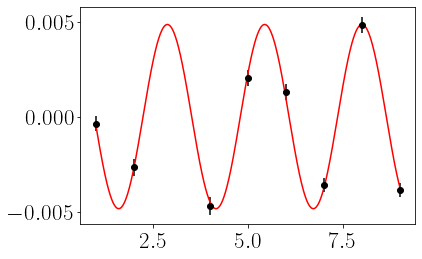

In [7]:
#find max chisq fast ttv
max_fast_chisq = 0
max_fast_ind = None
max_fast_period = None
for ii in range(0, len(chisq_grid_kepler)):
    chisq = chisq_grid_kepler[ii]
    period = Pgrid[ii]
    if chisq > max_fast_chisq:
        max_fast_ind = ii
        max_fast_chisq = chisq
        max_fast_period = period
        
        
#recalculate the max-chisq model
epochs_plot = np.arange(np.min(epochs_kepler), np.max(epochs_kepler), 0.01)
P_ttv = max_fast_period
max_model,_  = optimize.curve_fit(get_times_model, epochs_kepler, times_kepler, sigma=times_err_kepler, absolute_sigma = True)  
ttvs_max_model = get_times_model(epochs_plot, *max_model) - get_times_null_model(epochs_plot, *max_model[0:2])

ttvs_input = times_kepler - get_times_null_model(epochs_kepler, *max_model[0:2])

plt.errorbar(epochs_kepler, ttvs_input, yerr=times_err_kepler, ls='', marker='o', color='k')
plt.plot(epochs_plot, ttvs_max_model, 'r')

In [8]:
null_model,_  = optimize.curve_fit(get_times_null_model, epochs, times, sigma=times_err, absolute_sigma = True)
times_null_model = get_times_null_model(epochs, *null_model)
null_chisq = get_chisq(times, times_null_model, times_err)


chisq_grid_fast = []
for P_ttv in Pgrid:
    a_model,_  = optimize.curve_fit(get_times_model, epochs, times, sigma=times_err, absolute_sigma = True)
    times_a_model = get_times_model(epochs, *a_model)
    a_chisq = get_chisq(times, times_a_model, times_err)
    delta_chisq = null_chisq - a_chisq
    chisq_grid_fast.append(delta_chisq)
    

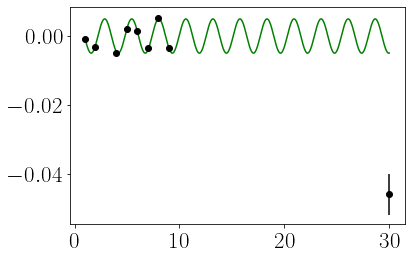

In [18]:
#find max chisq fast ttv
max_fast_chisq = 0
max_fast_ind = None
max_fast_period = None
for ii in range(0, len(chisq_grid_fast)):
    chisq = chisq_grid_fast[ii]
    period = Pgrid[ii]
    if chisq > max_fast_chisq:
        max_fast_ind = ii
        max_fast_chisq = chisq
        max_fast_period = period
        
        
#recalculate the max-chisq model
epochs_plot = np.arange(np.min(epochs), np.max(epochs), 0.01)
P_ttv = max_fast_period
max_fast_model,_  = optimize.curve_fit(get_times_model, epochs, times, sigma=times_err, absolute_sigma = True)  
ttvs_max_fast_model = get_times_model(epochs_plot, *max_fast_model) - get_times_null_model(epochs_plot, *max_fast_model[0:2])

ttvs_input = times - get_times_null_model(epochs, *max_fast_model[0:2])

plt.errorbar(epochs, ttvs_input, yerr=times_err, ls='', marker='o', color='k')
plt.plot(epochs_plot, ttvs_max_fast_model, 'g')


In [30]:

p_guess = np.append(max_fast_model, [0,0,max_fast_period])
p_guess

array([1.16622198e+02, 1.60884315e+02, 3.31977699e-03, 3.69706424e-03,
       0.00000000e+00, 0.00000000e+00, 2.57731959e+00])

In [36]:
null_model,_  = optimize.curve_fit(get_times_null_model, epochs, times, sigma=times_err, absolute_sigma = True)
times_null_model = get_times_null_model(epochs, *null_model)
null_chisq = get_chisq(times, times_null_model, times_err)


chisq_grid = []
p_guess = np.append(max_fast_model, [0,0,max_fast_period])
for P2_ttv in Pgrid:
    #P2_ttv = max_fast_period
    a_model,_  = optimize.curve_fit(get_times_model_2waves, epochs, times, 
                                    sigma=times_err, absolute_sigma = True,p0 = p_guess)
    print(a_model)
    times_a_model = get_times_model_2waves(epochs, *a_model)
    a_chisq = get_chisq(times, times_a_model, times_err)
    delta_chisq = null_chisq - max_fast_chisq - a_chisq

    chisq_grid.append(delta_chisq)

[ 1.16622121e+02  1.60884354e+02  9.50445142e-03 -3.07764731e-03
  2.86630346e-01  9.99283835e-03  2.38116160e+00]
[ 1.16622124e+02  1.60884354e+02  9.53155389e-03 -3.13062840e-03
  1.44127817e-01  1.00611544e-02  2.38051542e+00]
[ 1.16622126e+02  1.60884353e+02  9.57269233e-03 -3.22581912e-03
  9.69659823e-02  1.01746027e-02  2.37930747e+00]
[ 1.16622131e+02  1.60884353e+02  9.63162762e-03 -3.35579683e-03
  7.36528771e-02  1.03336656e-02  2.37771782e+00]
[ 1.16622137e+02  1.60884352e+02  9.71020577e-03 -3.53254502e-03
  5.99336441e-02  1.05495963e-02  2.37559714e+00]
[ 1.16622144e+02  1.60884351e+02  9.80764259e-03 -3.75798828e-03
  5.10124677e-02  1.08237703e-02  2.37296806e+00]
[ 1.16622152e+02  1.60884350e+02  9.92045812e-03 -4.03566596e-03
  4.48241309e-02  1.11559405e-02  2.36979215e+00]
[ 1.16622163e+02  1.60884348e+02  1.00558974e-02 -4.37114126e-03
  4.03912899e-02  1.15605125e-02  2.36613845e+00]
[ 1.16622173e+02  1.60884346e+02  1.02082373e-02 -4.78684239e-03
  3.71576437e-0

 -2.28494591e-01 -9.38435799e-02  2.53326533e+00]
[ 1.16622466e+02  1.60884269e+02  1.18093373e-01  7.98392218e-02
 -1.14963233e-01 -7.54643282e-02  2.54046041e+00]
[ 1.16622291e+02  1.60884297e+02  5.06590616e-02  5.93523919e-02
 -4.78145136e-02 -5.54247016e-02  2.54813662e+00]
[ 1.16622025e+02  1.60884338e+02  2.53924071e-03  1.56647920e-02
  3.85086497e-06 -1.23989149e-02  2.56591854e+00]
[ 1.16621799e+02  1.60884374e+02 -5.38502946e-03  1.88672336e-02
  7.65943634e-03 -1.61140598e-02  2.57048369e+00]
[ 1.16622075e+02  1.60884331e+02  4.63572805e-07  1.08040844e-02
  2.73203287e-03 -7.44352897e-03  2.57871988e+00]
[ 1.16621433e+02  1.60884433e+02 -1.02248310e-02  6.81819501e-03
  1.24034347e-02 -4.85890169e-03  2.59649527e+00]
[ 1.16621456e+02  1.60884431e+02 -7.01648930e-03  1.84093364e-03
  9.53289998e-03  2.07072766e-04  2.61704142e+00]
[ 1.16621450e+02  1.60884431e+02  9.73107144e-02 -5.16991764e-02
 -9.51238296e-02  5.37036002e-02  2.58107397e+00]
[ 1.16621375e+02  1.60884443e+

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



[ 1.16623545e+02  1.60884149e+02  9.33795846e-04  8.20708908e-03
  4.20217148e-03 -3.20422007e-04  2.61754746e+00]
[ 1.16623107e+02  1.60884203e+02  2.01398280e-03  6.55745460e-03
  2.61696358e-03 -4.25921659e-06  2.60178832e+00]
[1.16623386e+02 1.60884168e+02 1.50992665e-03 7.36046942e-03
 3.34144248e-03 1.24422581e-05 2.61238078e+00]
[1.16623404e+02 1.60884165e+02 1.67670929e-03 7.10264943e-03
 3.14462931e-03 2.24131431e-04 2.60754287e+00]
[1.16623339e+02 1.60884173e+02 1.88115557e-03 6.78203611e-03
 2.82668260e-03 3.22663051e-04 2.60482307e+00]
[1.16623287e+02 1.60884180e+02 2.03989137e-03 6.53103770e-03
 2.57086637e-03 3.84826447e-04 2.60312927e+00]
[1.16623267e+02 1.60884182e+02 2.14270804e-03 6.37182643e-03
 2.40792763e-03 4.57465949e-04 2.60176516e+00]
[1.16623190e+02 1.60884192e+02 2.29990388e-03 6.10334233e-03
 2.14571883e-03 4.96576621e-04 2.59923344e+00]
[1.16623143e+02 1.60884198e+02 2.39781547e-03 5.94412629e-03
 1.97590120e-03 5.05164069e-04 2.59859214e+00]
[1.16623106e+

 -2.97628970e-04 -1.75789491e-04  2.58209620e+00]
[ 1.16622420e+02  1.60884285e+02  3.39974700e-03  3.73775510e-03
 -2.89352659e-04 -1.77424875e-04  2.58197665e+00]
[ 1.16622417e+02  1.60884285e+02  3.40190515e-03  3.73284282e-03
 -2.82113990e-04 -1.83217018e-04  2.58168300e+00]
[ 1.16622406e+02  1.60884285e+02  3.38769570e-03  3.73394644e-03
 -2.54049362e-04 -1.62500081e-04  2.58141380e+00]
[ 1.16622418e+02  1.60884283e+02  3.38683027e-03  3.73792853e-03
 -2.54810211e-04 -1.69337641e-04  2.58166536e+00]
[ 1.16622398e+02  1.60884286e+02  3.38280240e-03  3.73507890e-03
 -2.40963003e-04 -1.75126441e-04  2.58163407e+00]
[ 1.16622412e+02  1.60884284e+02  3.39675514e-03  3.72504451e-03
 -2.51929115e-04 -1.79593639e-04  2.58086704e+00]
[ 1.16622416e+02  1.60884282e+02  3.38553890e-03  3.72974364e-03
 -2.51521587e-04 -1.62431124e-04  2.58103830e+00]
[ 1.16622406e+02  1.60884284e+02  3.39328259e-03  3.72454489e-03
 -2.53733119e-04 -1.88510569e-04  2.58104940e+00]
[ 1.16622421e+02  1.60884281e+

 -2.43489476e-03  1.34739167e-04  2.61763454e+00]
[ 1.16625065e+02  1.60883691e+02  2.33112921e-03  4.03045131e-03
 -2.56492554e-03  8.61140384e-05  2.62145476e+00]
[ 1.16624935e+02  1.60883719e+02  2.47736903e-03  3.93871859e-03
 -2.46497426e-03 -5.89355442e-06  2.61286254e+00]
[ 1.16625207e+02  1.60883663e+02  2.38598484e-03  3.99008203e-03
 -2.63028091e-03 -1.10847361e-04  2.61846002e+00]
[ 1.16625300e+02  1.60883645e+02  2.39836297e-03  3.98308097e-03
 -2.67347801e-03 -1.91563200e-04  2.61763562e+00]
[ 1.16625511e+02  1.60883602e+02  2.33908053e-03  4.01401178e-03
 -2.79236162e-03 -2.82550385e-04  2.62084493e+00]
[ 1.16625608e+02  1.60883582e+02  2.35240895e-03  4.00319917e-03
 -2.83612941e-03 -3.81141154e-04  2.62001127e+00]
[ 1.16625768e+02  1.60883551e+02  2.33694188e-03  4.01210209e-03
 -2.91493468e-03 -4.73369468e-04  2.62067386e+00]
[ 1.16625926e+02  1.60883519e+02  2.32187541e-03  4.01807059e-03
 -2.99143081e-03 -5.71568393e-04  2.62120867e+00]
[ 1.16626107e+02  1.60883483e+

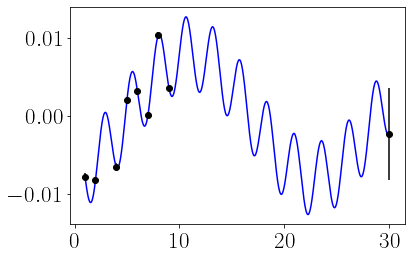

In [37]:
#find max chisq slow ttv
max_slow_chisq = 0
max_slow_ind = None
max_slow_period = None
for ii in range(0, len(chisq_grid)):
    chisq = chisq_grid[ii]
    period = Pgrid[ii]
    if chisq > max_slow_chisq:
        max_slow_ind = ii
        max_slow_chisq = chisq
        max_slow_period = period
        
        
#recalculate the max-chisq model
epochs_plot = np.arange(np.min(epochs), np.max(epochs), 0.01)
P2_ttv = max_slow_period
max_model,_  = optimize.curve_fit(get_times_model_2waves, epochs, times, 
                                  sigma=times_err, absolute_sigma = True, p0=p_guess)  
ttvs_max_model = get_times_model_2waves(epochs_plot, *max_model) - get_times_null_model(epochs_plot, *max_model[0:2])

ttvs_input = times - get_times_null_model(epochs, *max_model[0:2])

plt.errorbar(epochs, ttvs_input, yerr=times_err, ls='', marker='o', color='k')
plt.plot(epochs_plot, ttvs_max_model, 'b')

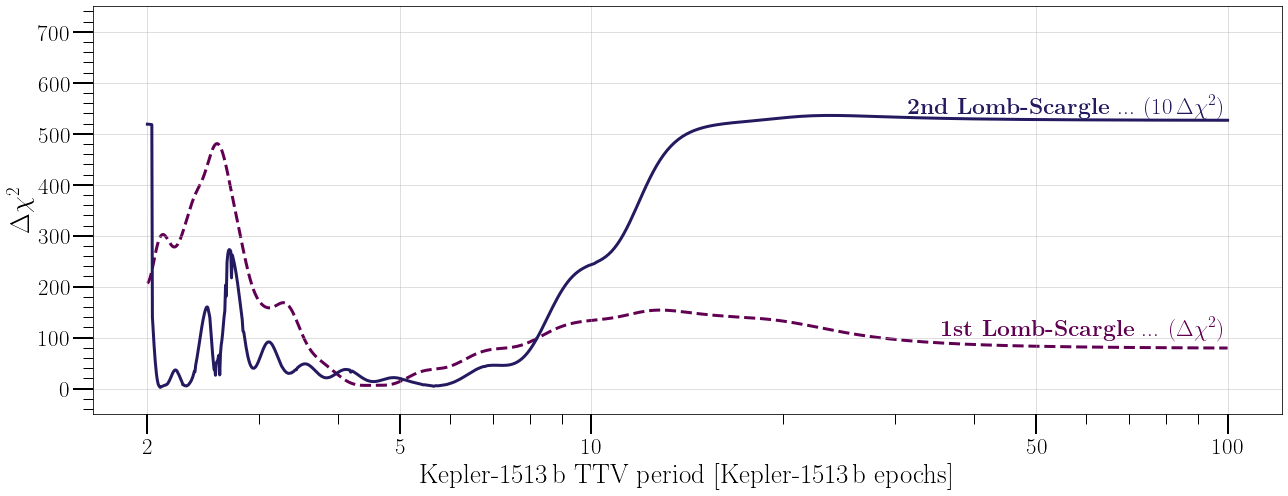

In [41]:
fig, ax = plt.subplots(1, figsize=[18, 7])


ax.plot(Pgrid, 10*np.array(chisq_grid), color="#241a60", lw=3)
ax.plot(Pgrid, chisq_grid_fast, color="#610053", lw=3, ls='--', zorder=-100)


ax.set_xlabel(r'Kepler-1513\,b TTV period [Kepler-1513\,b epochs]', fontsize=27)
ax.set_ylabel(r'$\Delta \chi ^2$', fontsize=27)

ax.set_xscale('log')


ax.grid(visible=True, alpha=0.5)
ax.set_xticks([2, 5, 10, 50, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


ax.text(99, 540, r'\textbf{2nd Lomb-Scargle} ... (10\,$\Delta \chi^2$)', color = '#241a60', fontsize=23, horizontalalignment='right')
ax.text(99, 105, r'\textbf{1st Lomb-Scargle} ... ($\Delta \chi^2$)', color = '#610053', fontsize=23, horizontalalignment='right')

#ax.text(6, 530, r'\textbf{Lomb-Scargle Periodogram}', color = 'k', fontsize=27, horizontalalignment='center')

# We change the length of ticks 
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
ax.minorticks_on()

plt.ylim(-50, 750)



plt.tight_layout()
plt.savefig('periodogram.pdf')
